***Using Decision Tree***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('shop data.csv')
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


***Separate Tergated value***

In [13]:
#Remove Tergeted Value
X=df.drop('buys',axis=1)

In [15]:
y=df.buys

In [17]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [19]:
X

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


***Encoding***

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
X=X.apply(le.fit_transform)

In [28]:
X

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


***Split Test Train data***

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [38]:
X_test

,age,income,gender,m_status
12,0,0,0,1
0,1,0,1,1
14,1,0,1,1
6,0,1,0,0
19,0,0,1,1
20,2,2,0,0
3,2,2,1,1


In [70]:
X_train

,age,income,gender,m_status
10,1,2,0,1
9,2,2,0,0
4,2,1,0,1
5,2,1,0,1
16,2,2,1,0
1,1,0,1,0
2,0,0,1,1
7,1,2,1,0
18,0,2,0,0
17,1,0,0,1


In [58]:
#Here doing math of entropy and IG
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
tree.predict(X_test)

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [72]:
tree.score(X_test,y_test)

0.5714285714285714

***Using cross_val_score for better result*** 

In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
result =cross_val_score(tree,X,y,cv=5)  #5 times

In [81]:
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [83]:
result.mean()

0.54

#### Using LOgisticRegression 

In [90]:
from sklearn.linear_model import LogisticRegression
result =cross_val_score(LogisticRegression(),X,y,cv=5)

In [92]:
result 

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [94]:
result.mean()

0.6

#### Using KNN

**Data Scaling**

In [114]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(X)
x_scaled

array([[0.5, 0. , 1. , 1. ],
       [0.5, 0. , 1. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [0. , 0.5, 0. , 0. ],
       [0.5, 1. , 1. , 0. ],
       [0.5, 0.5, 0. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 1. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 1. , 1. ],
       [0.5, 0. , 0. , 0. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 0.5, 1. , 1. ]])

In [146]:
from sklearn.neighbors import KNeighborsClassifier
result=cross_val_score(KNeighborsClassifier(n_neighbors=5),x_scaled,y,cv=5)

In [148]:
result

array([0.6 , 0.6 , 0.75, 0.75, 0.75])

In [150]:
result.mean()

0.6900000000000001

***Confusion Matrix***

In [156]:
y_predict=tree.predict(X_test)
y_predict

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [164]:
from sklearn import metrics

In [166]:
cm=metrics.confusion_matrix(y_test,y_predict)

In [168]:
cm

array([[0, 3],
       [0, 4]], dtype=int64)

In [170]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])

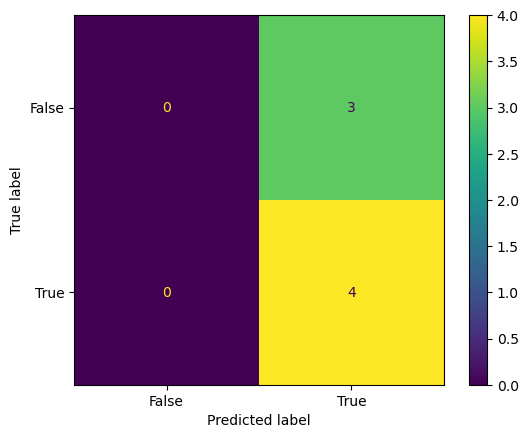

In [174]:
cm_display.plot()

In [176]:
metrics.precision_score(y_test,y_predict,average=None)

C:\Users\nafiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.        , 0.57142857])

In [178]:
metrics.recall_score(y_test,y_predict,average=None)

array([0., 1.])

In [180]:
metrics.accuracy_score(y_test,y_predict)

0.5714285714285714

***All in One***

In [185]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         3
         yes       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\nafiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nafiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nafiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
